In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [3]:
df = pd.DataFrame(data=[
    [12,39],
    [20,39],
    [28,30],
    [18,52],
    [29,54],
    [33,46],
    [24,55],
    [45,99],
    [45,63],
    [52,70],
    [51,66],
    [52,63],
    [55,58],
    [53,23],
    [55,14],
    [61, 8],
    [64,19],
    [69, 7],
    [72,24]
], columns=['x', 'y'])
df.shape

(19, 2)

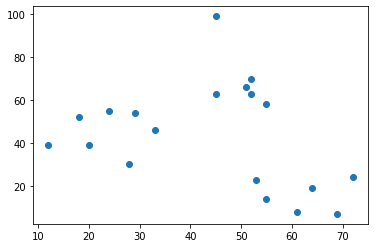

In [4]:
plt.scatter(df['x'], df['y'])

## From scratch

### Create centroids

In [5]:
np.random.seed(200)
k=3
centroids={}

for i in range(k):
    centroids[i+1] = [
        np.random.randint(df.x.min(),df.x.max()),
        np.random.randint(df.y.min(),df.y.max())
    ]
centroids

{1: [38, 23], 2: [16, 49], 3: [67, 83]}

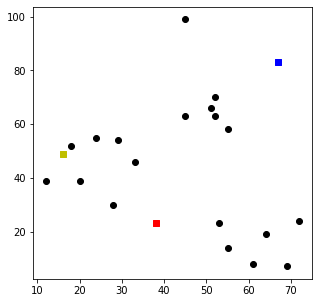

In [6]:
# Plot the data points with centroids
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color='k')

colmap = {1: 'r', 2: 'y', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], marker='s')

plt.show()

### Assign data points to centroids

In [7]:
def compute_distance():
    for i in centroids.keys():

        distance = np.sqrt(
           (df['x']-centroids[i][0])**2
         + (df['y']-centroids[i][1])**2
        )
        df['distance_from_{}'.format(i)] = distance

compute_distance()
df.head()

,x,y,distance_from_1,distance_from_2,distance_from_3
0,12,39,30.528675,10.770330,70.434367
1,20,39,24.083189,10.770330,64.381674
2,28,30,12.206556,22.472205,65.802736
3,18,52,35.227830,3.605551,57.982756
4,29,54,32.280025,13.928388,47.801674


In [8]:
cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
cols

['distance_from_1', 'distance_from_2', 'distance_from_3']

In [9]:
def assign_centroids():
    df['closest'] = df[cols].idxmin(axis=1) \
                            .str.replace('distance_from_', '')

assign_centroids()
df.head()

,x,y,distance_from_1,distance_from_2,distance_from_3,closest
0,12,39,30.528675,10.770330,70.434367,2
1,20,39,24.083189,10.770330,64.381674,2
2,28,30,12.206556,22.472205,65.802736,1
3,18,52,35.227830,3.605551,57.982756,2
4,29,54,32.280025,13.928388,47.801674,2


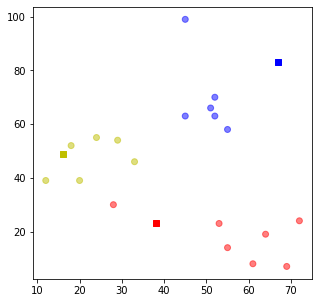

In [10]:
# Plot classified data points
def plot_df():
    fig = plt.figure(figsize=(5,5))

    plt.scatter(
        df['x'],
        df['y'],
        color=df['closest'].map(lambda x: colmap[int(x)]),
        alpha=0.5)

    # Plot centroids
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i], marker='s')

plot_df()

### Update centroids position

In [11]:
def update_centroids():
    for i in centroids.keys():
        points = df[df['closest'] == str(i)]

        centroids[i][0] = np.mean(points['x'])
        centroids[i][1] = np.mean(points['y'])

update_centroids()
centroids

{1: [57.42857142857143, 17.857142857142858],
 2: [22.666666666666668, 47.5],
 3: [50.0, 69.83333333333333]}

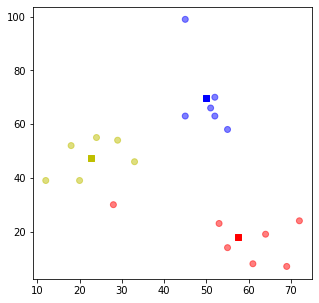

In [12]:
plot_df()

### Repeat

Until centroids don't move anymore

In [13]:
i = 0 
while True:
    compute_distance()

    before = df['closest'].copy()
    assign_centroids()

    if (df['closest'] != before).sum() == 0:
        break
    if i == 100:
        break

    update_centroids()
    i += 1

print('KNN converged after {:d} iteration(s)'.format(i))
centroids

KNN converged after 1 iteration(s)


{1: [62.333333333333336, 15.833333333333334],
 2: [23.428571428571427, 45.0],
 3: [50.0, 69.83333333333333]}

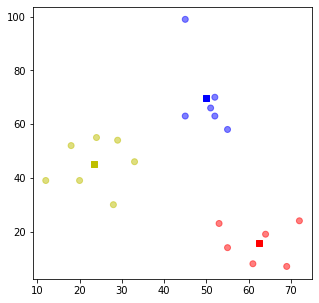

In [14]:
plot_df()

## Using sklearn

In [15]:
from sklearn.cluster import KMeans

In [16]:
X = df[['x', 'y']]

kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(X)
kmeans.cluster_centers_

array([[62.33333333, 15.83333333],
       [23.42857143, 45.        ],
       [50.        , 69.83333333]])

In [17]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)